**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Production economy and CO2 taxation](#toc1_)    
- 2. [Problem 2: Career choice model](#toc2_)    
- 3. [Problem 3: Barycentric interpolation](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [17]:
import numpy as np
from types import SimpleNamespace
from scipy.optimize import minimize_scalar
from scipy.optimize import fsolve
import pandas as pd
import matplotlib.pyplot as plt
from examproject import ProblemOne

model1=ProblemOne()

## 1. <a id='toc1_'></a>[Problem 1: Production economy and CO2 taxation](#toc0_)

Consider a production economy with two firms indexed by $j \in \{1,2\}$. Each produce its own good. They solve

$$
\begin{align*}
\max_{y_{j}}\pi_{j}&=p_{j}y_{j}-w_{j}\ell_{j}\\\text{s.t.}\;&y_{j}=A\ell_{j}^{\gamma}.
\end{align*}
$$

Optimal firm behavior is

$$
\begin{align*}
\ell_{j}^{\star}(w,p_{j})&=\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}} \\
y_{j}^{\star}(w,p_{j})&=A\left(\ell_{j}^{\star}(w,p_{j})\right)^{\gamma}
\end{align*}
$$

The implied profits are

$$
\pi_{j}^*(w,p_{j})=\frac{1-\gamma}{\gamma}w\cdot\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}}
$$

A single consumer supplies labor, and consumes the goods the firms produce. She also recieves the implied profits of the firm.<br>
She solves:

$$
\begin{align*}
U(p_1,p_2,w,\tau,T) = \max_{c_{1},c_{2},\ell} & \log(c_{1}^{\alpha}c_{2}^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} \\
\text{s.t.}\,\,\,&p_{1}c_{1}+(p_{2}+\tau)c_{2}=w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})
\end{align*}
$$

where $\tau$ is a tax and $T$ is lump-sum transfer. <br>
For a given $\ell$, it can be shown that optimal behavior is

$$
\begin{align*}
c_{1}(\ell)&=\alpha\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{1}} \\
c_{2}(\ell)&=(1-\alpha)\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{2}+\tau} \\
\end{align*}
$$
Such that optimal behavior is:
$$
\ell^* = \underset{\ell}{\arg\max} \log(\left(c_{1}(\ell)\right)^{\alpha}\cdot \left(c_{2}(\ell)\right)^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} 
$$
With optimal consumption:
$$
\begin{align*}
c_1^*=c_{1}(\ell^*) \\
c_2^*=c_{2}(\ell^*)\\
\end{align*}
$$


The government chooses $\tau$ and balances its budget so $T=\tau c_2^*$. We initially set $\tau,T=0$.

Market clearing requires:

1. Labor market: $\ell^* = \ell_1^* + \ell_2^*$
1. Good market 1: $c_1^* = y_1^*$
1. Good market 2: $c_2^* = y_2^*$


**Question 1:** Check market clearing conditions for $p_1$ in `linspace(0.1,2.0,10)` and $p_2$ in `linspace(0.1,2.0,10)`. We choose $w=1$ as numeraire.

We have understood the question, to find the p2 for each p1 in linspace(0.1,2.0,10) and vice versa. 

**Checking market clearing for p2 when p1 is in linspace(0.1, 2.0, 10)**

Here we take the economy and parameter values given in the problem and use for-loops to find the p2 value, which will clear the labor market, the market for good 1 and the market for good 2 respectively.

[1.7789891453035092, 1.7544264748491598, 1.7035510939596743, 1.6238918071521937, 1.5109027336230076, 1.3562793728194353, 1.143251766380248, 0.8279007567700077, 0.0007920327530008603, 0.0030313045901902824]
[0.9996882559370593, 0.9997267018414389, 0.9997961470621961, 0.9998802886904739, 0.9999566567261834, 0.7378259209436087, 1.636002907581231, 2.2210215176282246, 2.7137326746530195, 3.1622779606977414]
[0.9996320934441062, 0.9987219861333317, 1.3658202433244253, 1.7957254085161714, 2.1956848579786183, 1.3895523755476977, 1.1708811001973725, 1.062876482589226, 1.0053071122791744, 0.9770067298942325]


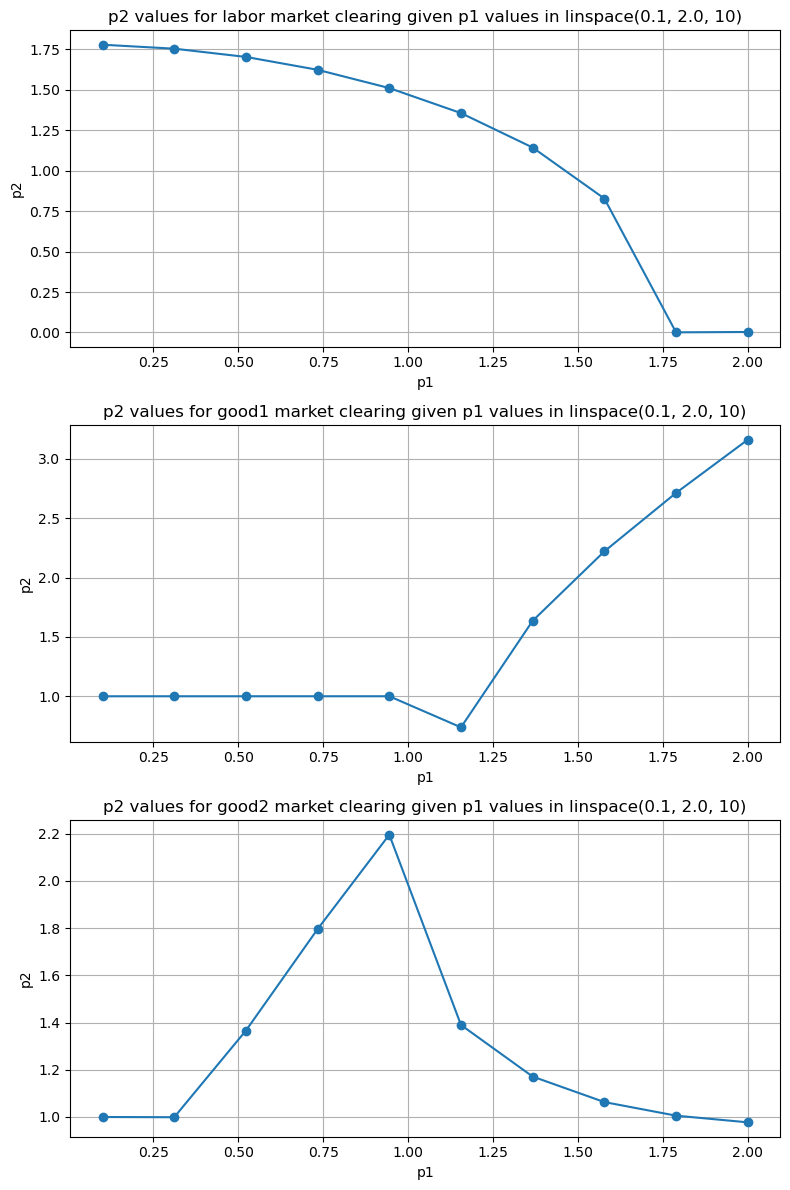

In [18]:
w_num = 1 #we get w=1 numeraire
p1_values = np.linspace(0.1, 2.0, 10) #setting p1 values to be 10 evenly destributed decimals between 0.1 and 2

#setting up empty lists for p2 values which clear the labor market, the market for good 1 and 2 respectively. to be appended.
p2_values_labor =[]
p2_values_good1 = []
p2_values_good2 = []

#Creating forloops to append above lists.
for p1 in p1_values:
    p2_initial_guess = 1  # Initial guess for p2, adjust as needed
    p2_solution = fsolve(model1.labor_clear_con, p2_initial_guess, args=(p1, w_num)) #using fsolve to find the root-solution of the condition
    p2_values_labor.append(p2_solution[0]) #appending solution list to from solution

for p1 in p1_values:
    p2_initial_guess = 1  # Initial guess for p2, adjust as needed
    p2_solution = fsolve(model1.good1_clear_con, p2_initial_guess, args=(p1, w_num)) #using fsolve to find the root-solution of the condition
    p2_values_good1.append(p2_solution[0]) #appending solution list to from solution

for p1 in p1_values:
    p2_initial_guess = 1  # Initial guess for p2, adjust as needed
    p2_solution = fsolve(model1.good2_clear_con, p2_initial_guess, args=(p1, w_num)) #using fsolve to find the root-solution of the condition
    p2_values_good2.append(p2_solution[0]) #appending solution list to from solution

#printing the solution lists for p2 which clears each respective market given p1 is linspace(0.1, 2.0, 10)
print(p2_values_labor)
print(p2_values_good1)
print(p2_values_good2)

#Setting up a plot, with three subplots, one for each markt to clear
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

axs[0].plot(p1_values, p2_values_labor, marker='o')
axs[0].set_xlabel('p1')
axs[0].set_ylabel('p2')
axs[0].set_title('p2 values for labor market clearing given p1 values in linspace(0.1, 2.0, 10)')
axs[0].grid(True)

axs[1].plot(p1_values, p2_values_good1, marker='o')
axs[1].set_xlabel('p1')
axs[1].set_ylabel('p2')
axs[1].set_title('p2 values for good1 market clearing given p1 values in linspace(0.1, 2.0, 10)')
axs[1].grid(True)

axs[2].plot(p1_values, p2_values_good2, marker='o')
axs[2].set_xlabel('p1')
axs[2].set_ylabel('p2')
axs[2].set_title('p2 values for good2 market clearing given p1 values in linspace(0.1, 2.0, 10)')
axs[2].grid(True)

plt.tight_layout()
plt.show()

Above are three grafes showing which p2 price clears the labor market, the market for good 1 and the market for good 2 respectively, for each p1 in linspace(0.1, 2.0, 10).

**Checking market clearing for p1 when p2 is in linspace(0.1, 2.0, 10)**

We have use the same approach as above to find the p1 values, which clear the labor market, the market for good 1 and the market for good 2 given p2 in linspace(0.1, 2.0, 10)

[1.7789891453043642, 1.7544264748494018, 1.703551093958371, 1.6238918071505684, 1.5109027336222784, 1.356279372819462, 1.1432517663807173, 0.8279007567701923, 0.0007920327448893346, 0.001218892713545412]
[1.1016510415623844, 1.1104126441395175, 1.1281678306233098, 1.1548898723200274, 1.1905038466815248, 1.2348507519908902, 1.2876583797722525, 1.3485277519043015, 1.4169346703604413, 1.4922572875999303]
[2.1039073155526586, 2.1161148683370374, 2.1420593195955044, 2.1802602455074407, 2.2323932658852694, 1.3895523755485106, 1.170881100197016, 1.0628764825891686, 1.0053071122789736, 0.9770067298942452]


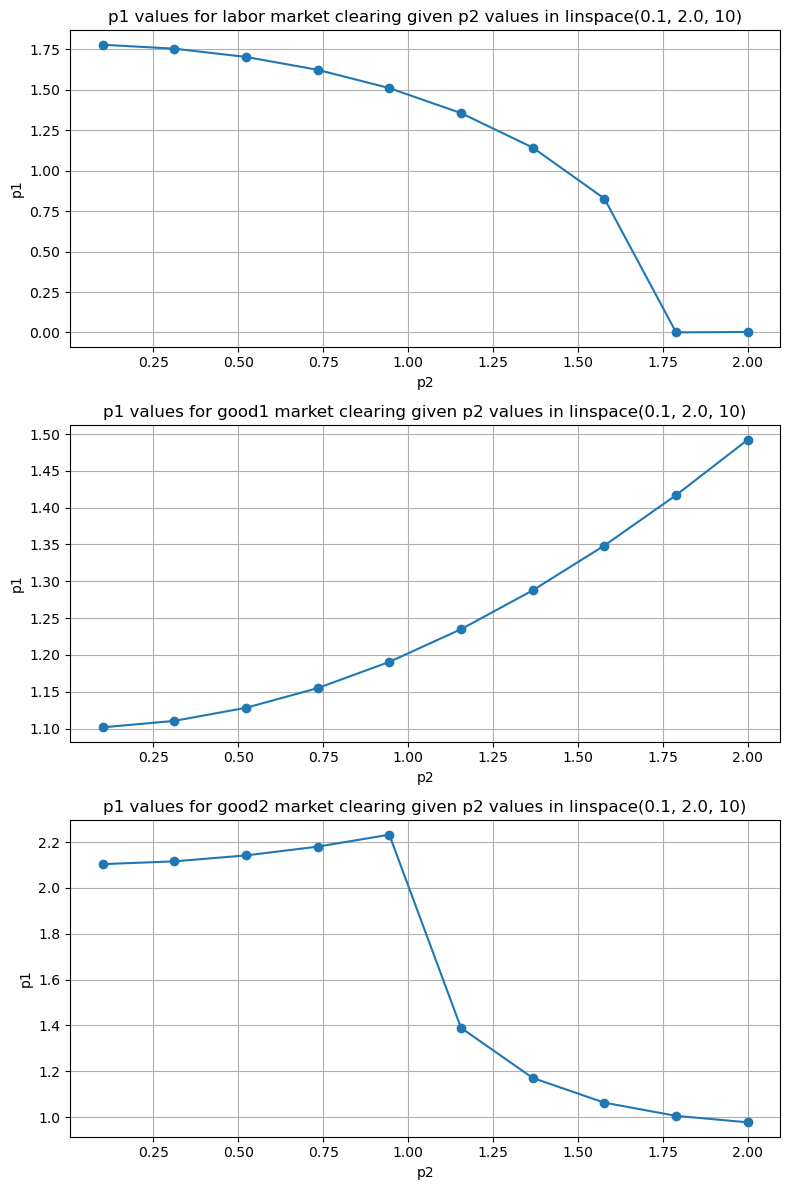

In [19]:
p2_values = np.linspace(0.1, 2.0, 10) #setting p2 values to be 10 evenly destributed decimals between 0.1 and 2

#setting up empty lists for p2 values which clear the labor market, the market for good 1 and 2 respectively. to be appended.
p1_values_labor =[]
p1_values_good1 = []
p1_values_good2 = []

#Creating forloops to append above lists.
for p2 in p2_values:
    p1_initial_guess = 1  # Initial guess for p1
    p1_solution = fsolve(model1.labor_clear_con2, p1_initial_guess, args=(p2, w_num)) #using fsolve to find the root-solution of the condition
    p1_values_labor.append(p1_solution[0]) #appending solution list to from solution

for p2 in p2_values:
    p1_initial_guess = 1  # Initial guess for p1
    p1_solution = fsolve(model1.good1_clear_con2, p1_initial_guess, args=(p2, w_num)) #using fsolve to find the root-solution of the condition
    p1_values_good1.append(p1_solution[0]) #appending solution list to from solution

for p2 in p2_values:
    p1_initial_guess = 1  # Initial guess for p1
    p1_solution = fsolve(model1.good2_clear_con2, p1_initial_guess, args=(p2, w_num)) #using fsolve to find the root-solution of the condition
    p1_values_good2.append(p1_solution[0]) #appending solution list to from solution

#printing the solution lists for p2 which clears each respective market given p1 is linspace(0.1, 2.0, 10)
print(p1_values_labor)
print(p1_values_good1)
print(p1_values_good2)

#Setting up a plot, with three subplots, one for each markt to clear.   
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

axs[0].plot(p2_values, p2_values_labor, marker='o')
axs[0].set_xlabel('p2')
axs[0].set_ylabel('p1')
axs[0].set_title('p1 values for labor market clearing given p2 values in linspace(0.1, 2.0, 10)')
axs[0].grid(True)

axs[1].plot(p2_values, p1_values_good1, marker='o')
axs[1].set_xlabel('p2')
axs[1].set_ylabel('p1')
axs[1].set_title('p1 values for good1 market clearing given p2 values in linspace(0.1, 2.0, 10)')
axs[1].grid(True)

axs[2].plot(p2_values, p1_values_good2, marker='o')
axs[2].set_xlabel('p2')
axs[2].set_ylabel('p1')
axs[2].set_title('p1 values for good2 market clearing given p2 values in linspace(0.1, 2.0, 10)')
axs[2].grid(True)

plt.tight_layout()
plt.show()


Above are three grafes showing which p1 price clears the labor market, the market for good 1 and the market for good 2 respectively, for each p2 in linspace(0.1, 2.0, 10).

**Question 2:** Find the equilibrium prices $p_1$ and $p_2$.<br>
*Hint: you can use Walras' law to only check 2 of the market clearings*

In [20]:
# write your answer here

Assume the government care about the social welfare function:

$$
SWF = U - \kappa y_2^*
$$

Here $\kappa$ measures the social cost of carbon emitted by the production of $y_2$ in equilibrium.

**Question 3:** What values of $\tau$ and (implied) $T$ should the government choose to maximize $SWF$?

In [21]:
# write your answer here

## 2. <a id='toc2_'></a>[Problem 2: Career choice model](#toc0_)

Consider a graduate $i$ making a choice between entering $J$ different career tracks. <br>
Entering career $j$ yields utility $u^k_{ij}$. This value is unknown to the graduate ex ante, but will ex post be: <br>
$$
    u_{i,j}^k = v_{j} + \epsilon_{i,j}^k
$$

They know that $\epsilon^k_{i,j}\sim \mathcal{N}(0,\sigma^2)$, but they do not observe $\epsilon^k_{i,j}$ before making their career choice. <br>

Consider the concrete case of $J=3$ with:
$$
\begin{align*}
    v_{1} &= 1 \\
    v_{2} &= 2 \\
    v_{3} &= 3
\end{align*}
$$

If the graduates know the values of $v_j$ and the distribution of $\epsilon_{i,j}^k$, they can calculate the expected utility of each career track using simulation: <br>
$$
    \mathbb{E}\left[ u^k_{i,j}\vert v_j \right] \approx v_j + \frac{1}{K}\sum_{k=1}^K \epsilon_{i,j}^k
$$

In [22]:
par = SimpleNamespace()
par.J = 3
par.N = 10
par.K = 10000

par.F = np.arange(1,par.N+1)
par.sigma = 2

par.v = np.array([1,2,3])
par.c = 1

**Question 1:** Simulate and calculate expected utility and the average realised utility for $K=10000$ draws, for each career choice $j$.


In [23]:
# write your answer here

Now consider a new scenario: Imagine that the graduate does not know $v_j$. The *only* prior information they have on the value of each job, comes from their $F_{i}$ friends that work in each career $j$. After talking with them, they know the average utility of their friends (which includes their friends' noise term), giving them the prior expecation: <br>
$$
\tilde{u}^k_{i,j}\left( F_{i}\right) = \frac{1}{F_{i}}\sum_{f=1}^{F_{i}} \left(v_{j} + \epsilon^k_{f,j}\right), \; \epsilon^k_{f,j}\sim \mathcal{N}(0,\sigma^2)
$$
For ease of notation consider that each graduate have $F_{i}=i$ friends in each career. <br>

For $K$ times do the following: <br>
1. For each person $i$ draw $J\cdot F_i$ values of $\epsilon_{f,j}^{k}$, and calculate the prior expected utility of each career track, $\tilde{u}^k_{i,j}\left( F_{i}\right)$. <br>
Also draw their own $J$ noise terms, $\epsilon_{i,j}^k$
1. Each person $i$ chooses the career track with the highest expected utility: $$j_i^{k*}= \arg\max_{j\in{1,2\dots,J}}\left\{ \tilde{u}^k_{i,j}\left( F_{i}\right)\right\} $$
1. Store the chosen careers: $j_i^{k*}$, the prior expectation of the value of their chosen career: $\tilde{u}^k_{i,j=j_i^{k*}}\left( F_{i}\right)$, and the realized value of their chosen career track: $u^k_{i,j=j_i^{k*}}=v_{j=j_i^{k*}}+\epsilon_{i,j=j_i^{k*}}^k$.

Chosen values will be: <br>
$i\in\left\{1,2\dots,N\right\}, N=10$ <br>
$F_i = i$<br>
So there are 10 graduates. The first has 1 friend in each career, the second has 2 friends, ... the tenth has 10 friends.

**Question 2:** Simulate and visualize: For each type of graduate, $i$, the share of graduates choosing each career, the average subjective expected utility of the graduates, and the average ex post realized utility given their choice. <br>
That is, calculate and visualize: <br>
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \mathbb{I}\left\{ j=j_i^{k*} \right\}  \;\forall j\in\left\{1,2,\dots,J\right\}
\end{align*}
$$
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \tilde{u}^k_{ij=j_i^{k*}}\left( F_{i}\right)
\end{align*}
$$
And 
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} u^k_{ij=j_i^{k*}} 
\end{align*}
$$
For each graduate $i$.

In [24]:
# Write your answer here 

After a year of working in their career, the graduates learn $u^k_{ij}$ for their chosen job $j_i^{k*}$ perfectly. <br>
The can switch to one of the two remaining careers, for which they have the same prior as before, but it will now include a switching cost of $c$ which is known.
Their new priors can be written as: 
$$
\tilde{u}^{k,2}_{ij}\left( F_{i}\right) = \begin{cases}
            \tilde{u}^k_{ij}\left( F_{i}\right)-c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

We will set $c=1$.

Their realized utility will be: <br>
$$
u^{k,2}_{ij}= \begin{cases}
            u_{ij}^k -c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

**Question 3:** Following the same approach as in question 2, find the new optimal career choice for each $i$, $k$. Then for each $i$, calculate the average subjective expected utility from their new optimal career choice, and the ex post realized utility of that career. Also, for each $i$, calculate the share of graduates that chooses to switch careers, conditional on which career they chose in the first year. <br>

In [25]:
# write your answer here

## 3. <a id='toc3_'></a>[Problem 3: Barycentric interpolation](#toc0_)

**Problem:** We have a set of random points in the unit square,

$$
\mathcal{X} = \{(x_1,x_2)\,|\,x_1\sim\mathcal{U}(0,1),x_2\sim\mathcal{U}(0,1)\}.
$$

For these points, we know the value of some function $f(x_1,x_2)$,

$$
\mathcal{F} = \{f(x_1,x_2) \,|\, (x_1,x_2) \in \mathcal{X}\}.
$$

Now we want to approximate the value $f(y_1,y_2)$ for some  $y=(y_1,y_2)$, where $y_1\sim\mathcal{U}(0,1)$ and $y_2\sim\mathcal{U}(0,1)$.

**Building block I**

For an arbitrary triangle $ABC$ and a point $y$, define the so-called barycentric coordinates as:

$$
\begin{align*}
  r^{ABC}_1 &= \frac{(B_2-C_2)(y_1-C_1) + (C_1-B_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_2 &= \frac{(C_2-A_2)(y_1-C_1) + (A_1-C_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_3 &= 1 - r_1 - r_2.
\end{align*}
$$

If $r^{ABC}_1 \in [0,1]$, $r^{ABC}_2 \in [0,1]$, and $r^{ABC}_3 \in [0,1]$, then the point is inside the triangle.

We always have $y = r^{ABC}_1 A + r^{ABC}_2 B + r^{ABC}_3 C$.

**Building block II**

Define the following points:

$$
\begin{align*}
A&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}>y_{2}\\
B&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}<y_{2}\\
C&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}<y_{2}\\
D&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}>y_{2}.
\end{align*}
$$

**Algorithm:**

1. Compute $A$, $B$, $C$, and $D$. If not possible return `NaN`.
1. If $y$ is inside the triangle $ABC$ return $r^{ABC}_1 f(A) + r^{ABC}_2 f(B) + r^{ABC}_3 f(C)$.
1. If $y$ is inside the triangle $CDA$ return $r^{CDA}_1 f(C) + r^{CDA}_2 f(D) + r^{CDA}_3 f(A)$.
1. Return `NaN`.



**Sample:**

In [26]:
# Generate random points:

# Set the random seed for reproductability
rng = np.random.default_rng(2024)

# Generate (50) random points in the unit square X
X = rng.uniform(size=(50,2))
# Define the target point y
y = rng.uniform(size=(2,))

**Questions 1:** Find $A$, $B$, $C$ and $D$. Illustrate these together with $X$, $y$ and the triangles $ABC$ and $CDA$.

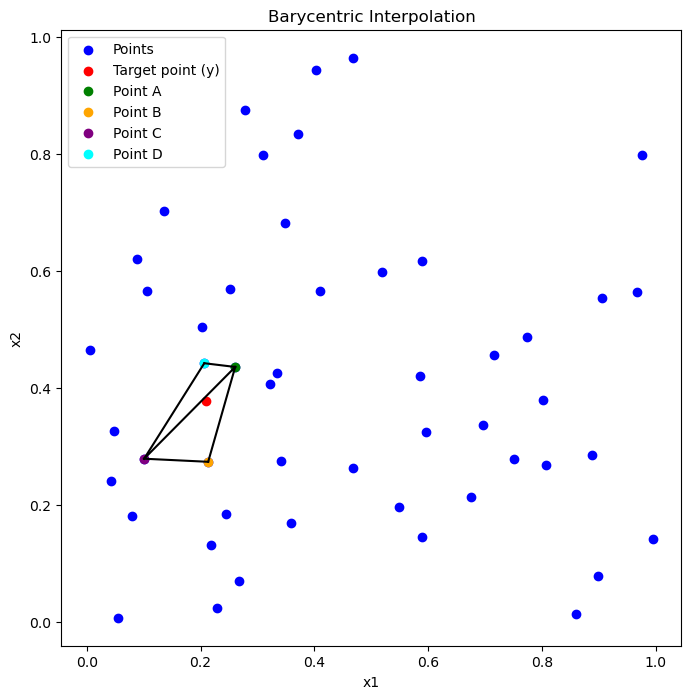

In [27]:
# We define the function f
f = lambda x: x[0] * x[1]

# Calculates the function values for the points in X
F = np.array([f(x) for x in X])

# We now define the points A,B,C and D:

# We use "np.linalg.norm(x - y)" as it is the same as writing the Euclidean distance between two points. 
# So the Euclidean in the functions, we instead compute using numpy.
def points(X, y):
    A = min((x for x in X if x[0] > y[0] and x[1] > y[1]), key=lambda x: np.linalg.norm(x - y))
    B = min((x for x in X if x[0] > y[0] and x[1] < y[1]), key=lambda x: np.linalg.norm(x - y))
    C = min((x for x in X if x[0] < y[0] and x[1] < y[1]), key=lambda x: np.linalg.norm(x - y))
    D = min((x for x in X if x[0] < y[0] and x[1] > y[1]), key=lambda x: np.linalg.norm(x - y))
    return A, B, C, D
A, B, C, D = points(X, y)

# Plot the points and the triangles
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c='blue', label='Points')
plt.scatter(*y, c='red', label='Target point (y)')
plt.scatter(*A, c='green', label='Point A')
plt.scatter(*B, c='orange', label='Point B')
plt.scatter(*C, c='purple', label='Point C')
plt.scatter(*D, c='cyan', label='Point D')

# Draw triangles
plt.plot([A[0], B[0]], [A[1], B[1]], 'k-')
plt.plot([B[0], C[0]], [B[1], C[1]], 'k-')
plt.plot([C[0], A[0]], [C[1], A[1]], 'k-')
plt.plot([C[0], D[0]], [C[1], D[1]], 'k-')
plt.plot([D[0], A[0]], [D[1], A[1]], 'k-')

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('Barycentric Interpolation')
plt.show()

**Question 2:** Compute the barycentric coordinates of the point $y$ with respect to the triangles $ABC$ and $CDA$. Which triangle is $y$ located inside?

In [28]:
# Now that we have defined the points we can define the Barycentric coordinates as per the exam question:
def barycentric_coordinates(A, B, C, y):
    denominator = (B[1] - C[1]) * (A[0] - C[0]) + (C[0] - B[0]) * (A[1] - C[1])
    r1 = ((B[1] - C[1]) * (y[0] - C[0]) + (C[0] - B[0]) * (y[1] - C[1])) / denominator
    r2 = ((C[1] - A[1]) * (y[0] - C[0]) + (A[0] - C[0]) * (y[1] - C[1])) / denominator
    r3 = 1 - r1 - r2
    return r1, r2, r3

# The Barycentric coordinates of y wrt. the triangle ABC:
rABC1, rABC2, rABC3 = barycentric_coordinates(A, B, C, y)
# The Barycentric coordinates of y wrt. the triangle CDA:
rCDA1, rCDA2, rCDA3 = barycentric_coordinates(C, D, A, y)


def interpolate(y, A, B, C, D, F):
    rABC1, rABC2, rABC3 = barycentric_coordinates(A, B, C, y)
    if all(0 <= r <= 1 for r in [rABC1, rABC2, rABC3]):
        return rABC1 * f(A) + rABC2 * f(B) + rABC3 * f(C)

    rCDA1, rCDA2, rCDA3 = barycentric_coordinates(C, D, A, y)
    if all(0 <= r <= 1 for r in [rCDA1, rCDA2, rCDA3]):
        return rCDA1 * f(C) + rCDA2 * f(D) + rCDA3 * f(A)

    return np.nan

# Calculate the interpolated value
interpolated_value = interpolate(y, A, B, C, D, F)

# Compare with the true value
true_value = f(y)

# Print the results
print(rABC1, rABC2, rABC3)
print(f"Interpolated value: {interpolated_value}")
print(f"True value: {true_value}")


Interpolated value: 0.08405201731052576
True value: 0.0789565216259594


The point y is located in the triangle ABC.

Now consider the function:
$$
f(x_1,x_2) = x_1 \cdot x_2
$$

In [29]:
f = lambda x: x[0]*x[1]
F = np.array([f(x) for x in X])

**Question 3:** Compute the approximation of $f(y)$ using the full algorithm. Compare with the true value.

In [30]:
# write your answer here

**Question 4:** Repeat question 3 for all points in the set $Y$.

In [31]:
Y = [(0.2,0.2),(0.8,0.2),(0.8,0.8),(0.8,0.2),(0.5,0.5)]

In [32]:
# write your answer here